# **Understanding profitability in the US financial market**
##### *Myroslava Sánchez Andrade A01730712 | 23/08/2022*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Aggregation of firm data per quarter (2000 - 2022Q2)**

In [191]:
# Storing the US firms quarters
us_q = pd.read_csv("dataset/us2022q2a.csv")

# Storing the US firms data
us_firms = pd.read_csv("dataset/usfirms2022.csv")
us_firms = us_firms[["firm", "Name","Sector NAICS\nlevel 1"]]
us_firms["industry"] = us_firms["Sector NAICS\nlevel 1"]
us_firms = us_firms.drop(columns = ["Sector NAICS\nlevel 1"])

In [192]:
# Merging the us_q and us_firms DataFrames
us_q = pd.merge(us_q, us_firms, on = ["firm"]) 
us_q

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,industry
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,206.211,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


## **Aggregation of firm data per year (2000 - 2022Q2)**

In [193]:
us_q_agg_sum = us_q.groupby([us_q.firm, us_q.year]).sum().reset_index()
us_q_agg_last = us_q.groupby([us_q.firm, us_q.year]).last().reset_index()

us_y = pd.DataFrame()

us_y["firm"] = us_q_agg_last["firm"]
us_y["name"] = us_q_agg_last["Name"]
us_y["industry"] = us_q_agg_last["industry"]

us_y["year"] = us_q_agg_last["q"].map(lambda x: int(str(x)[:-2]))
us_y["revenue"] = us_q_agg_sum["revenue"]
us_y["cogs"] = us_q_agg_sum["cogs"]
us_y["sgae"] = us_q_agg_sum["sgae"]
us_y["otheropexp"] = us_q_agg_sum["otheropexp"]
us_y["extraincome"] = us_q_agg_sum["extraincome"]
us_y["finexp"] = us_q_agg_sum["finexp"]
us_y["incometax"] = us_q_agg_sum["incometax"]

us_y["totalassets"] = us_q_agg_last["totalassets"]
us_y["totalliabilities"] = us_q_agg_last["totalliabilities"]
us_y["shortdebt"] = us_q_agg_last["shortdebt"]
us_y["longdebt"] = us_q_agg_last["longdebt"]
us_y["stockholderequity"] = us_q_agg_last["stockholderequity"]
us_y["adjprice"] = us_q_agg_last["adjprice"]
us_y["originalprice"] = us_q_agg_last["originalprice"]
us_y["sharesoutstanding"] = us_q_agg_last["sharesoutstanding"]

# Calculating the yearly cc returns
us_y_ladjprice = us_y.groupby([us_y.firm], as_index = False)[["adjprice", "year", "firm"]].shift(1)
us_y_ladjprice["year"] += 1
us_y = pd.merge(us_y, us_y_ladjprice, on = ["firm", "year"], how = "left")
us_y["r"] = np.log(us_y["adjprice_x"]) - np.log(us_y["adjprice_y"])

us_y["adjprice"] = us_y["adjprice_x"]
us_y = us_y.drop(columns = ["adjprice_x", "adjprice_y"])

# Calculating the firm size
us_y["market value"] = us_y["originalprice"] * us_y["sharesoutstanding"]
us_y["book value"] = us_y["stockholderequity"]

# Calculating the sales
us_y["sales"] = us_y["revenue"]

# Profit margin measures
us_y["net income"] = us_y["revenue"] + us_y["extraincome"] - us_y["cogs"] - us_y["sgae"] - us_y["otheropexp"] - us_y["finexp"] - us_y["incometax"]
us_y["profit margin"] = us_y["net income"] / us_y["sales"]

us_y

,firm,name,industry,year,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,originalprice,sharesoutstanding,r,adjprice,market value,book value,sales,net income,profit margin
0,A,"Agilent Technologies, Inc",Manufacturing,2000,8527000.0,4362000.0,3.283000e+06,0.0,80000.000000,0.000,336000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,54.75,456366.381,NaN,33.566841,2.498606e+07,5265000.000,8527000.0,6.260000e+05,0.073414
1,A,"Agilent Technologies, Inc",Manufacturing,2001,8689000.0,5338000.0,4.134000e+06,0.0,885000.000000,0.000,-72000.0,7986000.000,2327000.000,761000.000,0.000,5659000.000,28.51,463695.160,-0.652522,17.479281,1.321995e+07,5659000.000,8689000.0,1.740000e+05,0.020025
2,A,"Agilent Technologies, Inc",Manufacturing,2002,6010000.0,3694000.0,3.923000e+06,0.0,50000.000000,0.000,-525000.0,8203000.000,3576000.000,574000.000,1150000.000,4627000.000,17.96,467024.421,-0.462108,11.011150,8.387759e+06,4627000.000,6010000.0,-1.032000e+06,-0.171714
3,A,"Agilent Technologies, Inc",Manufacturing,2003,6056000.0,3762000.0,3.019000e+06,0.0,-233000.000000,0.000,1100000.0,6297000.000,3473000.000,311000.000,1150000.000,2824000.000,29.24,476149.083,0.487391,17.926839,1.392260e+07,2824000.000,6056000.0,-2.058000e+06,-0.339828
4,A,"Agilent Technologies, Inc",Manufacturing,2004,7181000.0,4058000.0,2.737000e+06,0.0,54000.000000,0.000,91000.0,7056000.000,3487000.000,261000.000,1150000.000,3569000.000,24.10,486841.087,-0.193326,14.775541,1.173287e+07,3569000.000,7181000.0,3.490000e+05,0.048600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82759,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing,2018,86.0,0.0,4.048383e+04,0.0,-474.667672,-961.323,0.0,67327.443,9725.782,0.000,0.000,57601.661,2.97,17626.873,-1.438765,2.970000,5.235181e+04,57601.661,86.0,-3.991117e+04,-464.083429
82760,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing,2019,0.0,0.0,3.431981e+04,0.0,-145.911130,-1522.138,0.0,87764.596,12167.853,243.677,109.689,75596.743,6.04,23198.010,0.709842,6.040000,1.401160e+05,75596.743,0.0,-3.294358e+04,-inf
82761,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing,2020,0.0,0.0,5.206254e+04,0.0,481.719800,-243.992,0.0,74056.776,13913.248,109.689,0.000,60143.528,3.30,29439.175,-0.604482,3.300000,9.714928e+04,60143.528,0.0,-5.133683e+04,-inf
82762,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing,2021,0.0,0.0,3.677039e+04,0.0,-559.680746,-21.047,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,41217.537,-0.136132,2.880000,1.187065e+05,70913.334,0.0,-3.730902e+04,-inf


## **2 Business Questions**

### 2.1 General questions

By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?

In [194]:
# Calculating average firm size, sales performance and profitability of each industry from 2000 to 2022Q2
us_y_agg_industry_mean = us_y.groupby(us_y.industry).mean()
us_y_agg_industry_mean["profit margin"] = us_y_agg_industry_mean["net income"] / us_y_agg_industry_mean["sales"]
us_y_agg_industry_mean[["market value", "book value", "sales", "net income", "profit margin"]]

,market value,book value,sales,net income,profit margin
industry,,,,,
-,5.577295e+06,4.111998e+06,7.950146e+04,45809.000000,0.576203
Accommodation and Food Services,8.892363e+06,1.148291e+06,1.776968e+06,154544.020853,0.086971
Administrative and Support and Waste Management and Remediation Services,1.228795e+07,1.906415e+06,1.325659e+06,142346.148135,0.107378
"Agriculture, Forestry, Fishing and Hunting",7.465416e+06,2.186921e+06,2.381280e+06,186079.920157,0.078143
"Arts, Entertainment, and Recreation",1.938675e+07,5.399205e+06,2.700349e+06,209934.261422,0.077743
Construction,2.985727e+06,1.635977e+06,2.542521e+06,110922.478487,0.043627
Educational Services,1.815934e+06,8.262262e+05,6.354223e+05,43453.976618,0.068386
Finance and Insurance,8.030993e+06,5.323538e+06,1.925706e+06,295518.810700,0.153460
Health Care and Social Assistance,3.769758e+06,9.278276e+05,1.650939e+06,52775.808134,0.031967


Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

In [195]:
us_y.drop(columns = ["year", "r", "sales", "stockholderequity", "originalprice", "adjprice", "profit margin"]).corrwith(us_y["r"]).abs().sort_values()

otheropexp           0.000350
totalliabilities     0.006984
shortdebt            0.008126
longdebt             0.008685
totalassets          0.009697
sharesoutstanding    0.014482
extraincome          0.014631
finexp               0.016729
sgae                 0.025328
book value           0.026837
cogs                 0.029485
revenue              0.036313
incometax            0.043993
market value         0.050047
net income           0.066182
dtype: float64

THE VARIABLES THAT ARE THE MOST CORRELATED WITH THE STOCK RETURNS ARE NET INCOME AND MARKET VALUE, SINCE THESE DIRECTLY AGGREGATE THE OVERALL STATE OF THE COMPANY (REVENUE, EXPENSES, ACTIVES, PASSIVES). THEREFORE, THE FIRMS WITH THE MOST PROFITABILITY ARE THE ONES ABLE TO MAXIMIZE REVENUE WHILE MINIMIZING EXPENSES.

### 2.2 Specific questions

#### 2.2.1 About descriptive statistics:

##### 2.2.1.1 Considering the most recent financial quarter of the dataset:

Show how many firms by industry there are in the sample.

industry
-                                                                              2
Accommodation and Food Services                                               69
Administrative and Support and Waste Management and Remediation Services     133
Agriculture, Forestry, Fishing and Hunting                                    16
Arts, Entertainment, and Recreation                                           21
Construction                                                                  45
Educational Services                                                          14
Finance and Insurance                                                        701
Health Care and Social Assistance                                             64
Information                                                                  261
Manufacturing                                                               1565
Mining, Quarrying, and Oil and Gas Extraction                                103
Other Services (exc

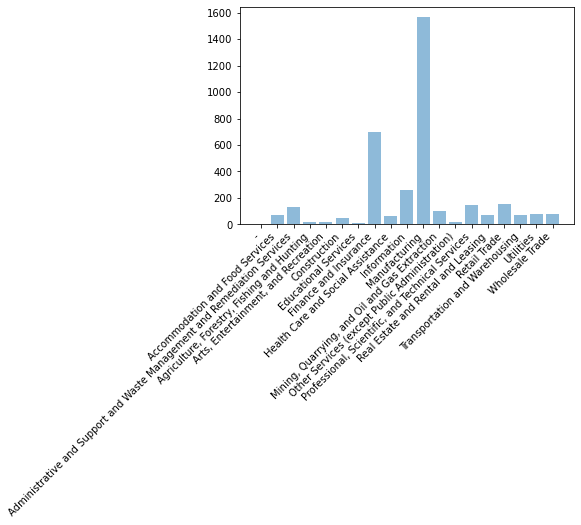

In [196]:
firms_per_industry = us_y.groupby(us_y.industry)["firm"].nunique()
print(firms_per_industry)
plt.bar(firms_per_industry.index, firms_per_industry.values, alpha=0.5)
plt.xticks(rotation=45, ha="right")
plt.show()

For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [204]:
us_2022q = us_q.groupby([us_q.industry, us_q.firm]).last()

# Calculating the firm size
us_2022q["market value"] = us_2022q["originalprice"] * us_2022q["sharesoutstanding"]
us_2022q["book value"] = us_2022q["stockholderequity"]

us_2022q_firm_size = us_2022q[["market value", "book value"]]
print(us_2022q_firm_size.mean(level = "industry").sort_values(by = "market value"))

                                                    market value    book value
industry                                                                      
Educational Services                                1.302581e+06  8.931767e+05
Other Services (except Public Administration)       2.136156e+06  5.288942e+05
Health Care and Social Assistance                   3.492004e+06  1.032707e+06
Real Estate and Rental and Leasing                  3.625235e+06  1.735378e+06
Construction                                        3.857422e+06  2.483906e+06
-                                                   4.865183e+06  5.704446e+06
Wholesale Trade                                     4.871519e+06  1.480863e+06
Mining, Quarrying, and Oil and Gas Extraction       6.783299e+06  3.156415e+06
Agriculture, Forestry, Fishing and Hunting          8.046780e+06  3.406701e+06
Finance and Insurance                               8.320303e+06  5.261687e+06
Accommodation and Food Services                     

C:\Users\myros\AppData\Local\Temp\ipykernel_13848\1677522855.py:8: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  print(us_2022q_firm_size.mean(level = "industry").sort_values(by = "market value"))


In [205]:
print(us_2022q_firm_size.std(level = "industry").sort_values(by = "market value"))

                                                    market value    book value
industry                                                                      
Educational Services                                1.039264e+06  1.110081e+06
Other Services (except Public Administration)       2.941800e+06  7.042536e+05
Construction                                        5.646435e+06  4.236454e+06
Health Care and Social Assistance                   6.973706e+06  1.861076e+06
Wholesale Trade                                     8.715762e+06  2.841107e+06
Real Estate and Rental and Leasing                  1.020873e+07  3.028491e+06
Mining, Quarrying, and Oil and Gas Extraction       1.362354e+07  5.780085e+06
Agriculture, Forestry, Fishing and Hunting          1.457197e+07  6.635579e+06
Utilities                                           2.346024e+07  1.029320e+07
Accommodation and Food Services                     2.507255e+07  2.440004e+06
Transportation and Warehousing                      

C:\Users\myros\AppData\Local\Temp\ipykernel_13848\3812105027.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.var(level=1) should use df.groupby(level=1).var().
  print(us_2022q_firm_size.std(level = "industry").sort_values(by = "market value"))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

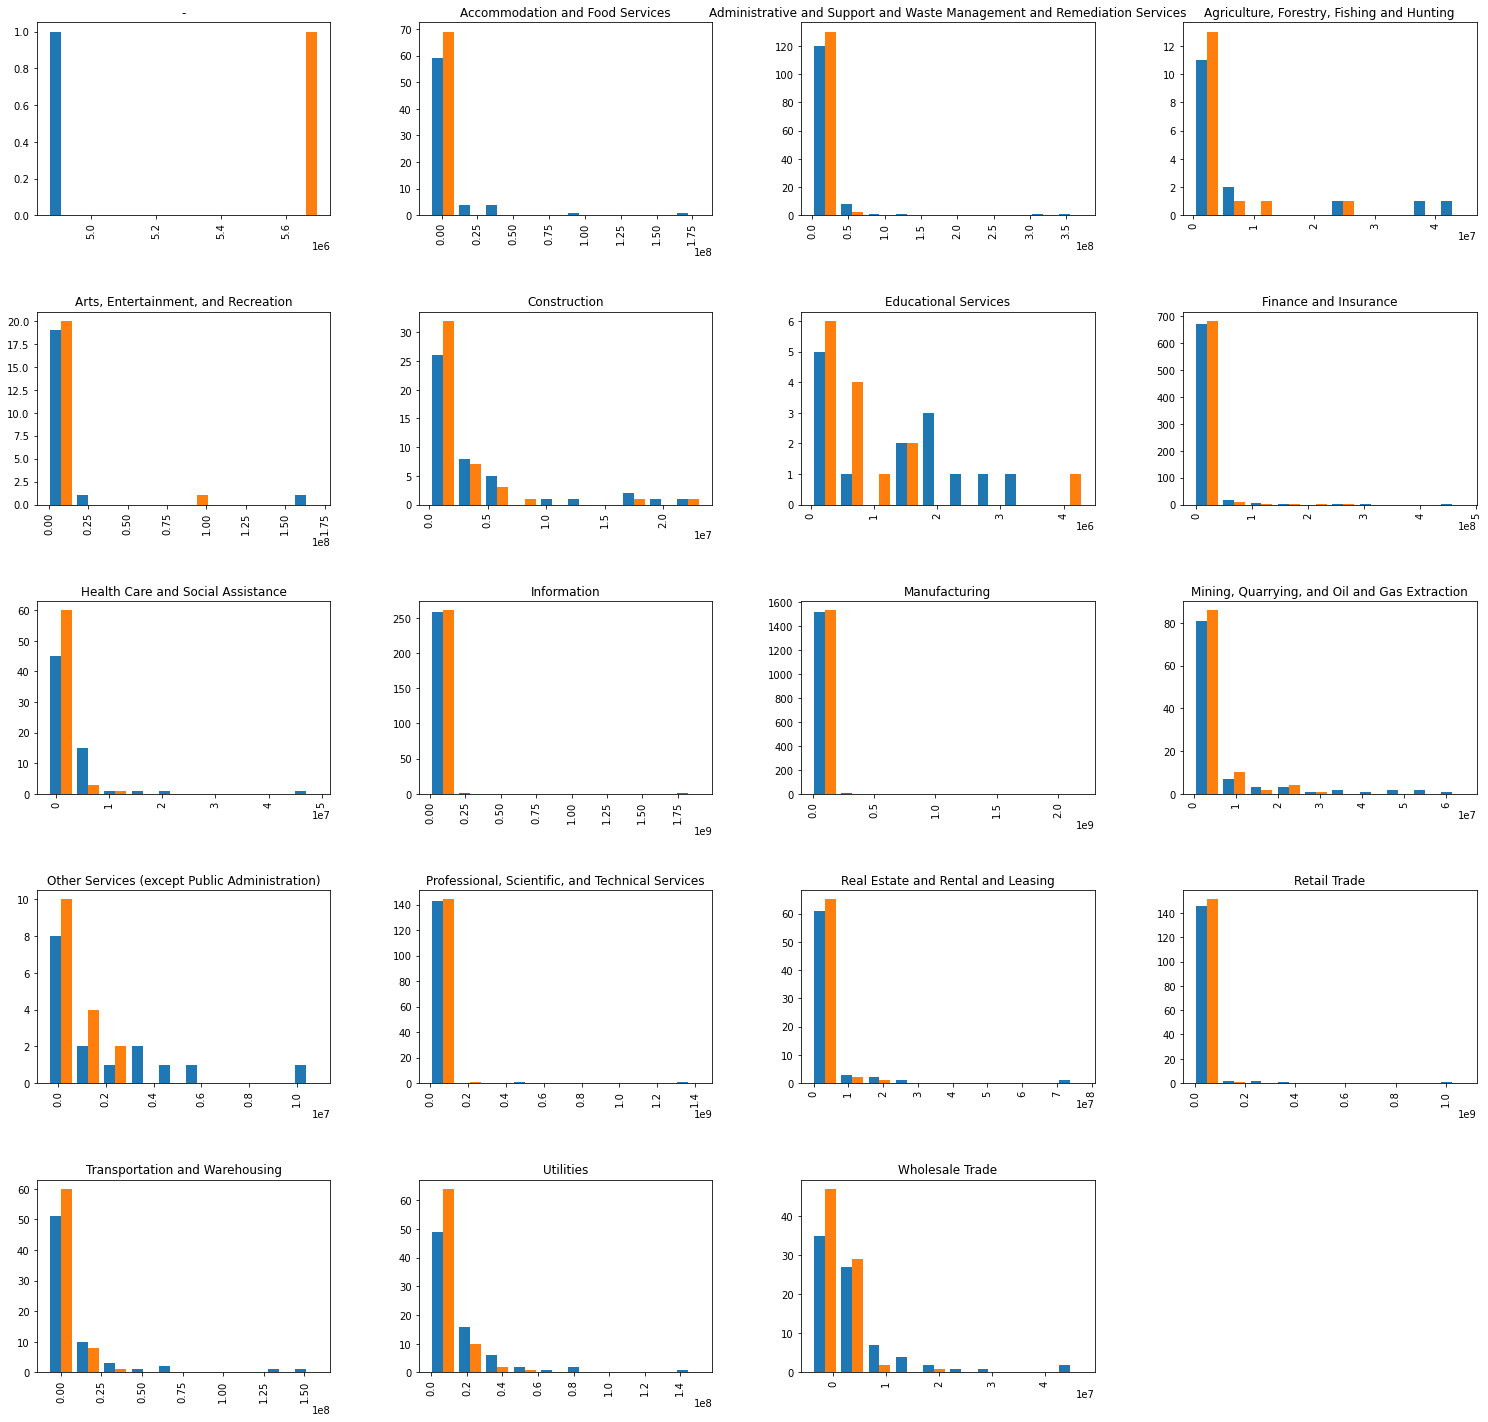

In [239]:
plt.clf()
us_2022q_firm_size.hist(by = "industry", figsize = (25, 25))
plt.xscale("log")
plt.savefig("firm.png", dpi = 300, transparent = False, facecolor = "white")
plt.show()